In [1]:
from wordcloud import WordCloud
import imageio
import matplotlib.pyplot as plt
import jieba
import requests
import json
import re
import requests
from bs4 import BeautifulSoup
import pandas as pd
from aip import AipNlp
APP_ID = '25045366'
API_KEY = 'rB6cqmgStTBSmdvIiqAu2lAU'
SECRET_KEY = 'cGnix3UBX1grYuUu7isH3tTRDL1fCEs7'

client = AipNlp(APP_ID, API_KEY, SECRET_KEY)

In [8]:
import requests
import json
import re
import requests
from bs4 import BeautifulSoup
import pandas as pd


 
 
# 下载页面
def download_page(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/68.0.3440.106 Safari/537.36'
    }
    res = requests.get(url, headers=headers)
    return res
 
 
# 根据dvid获取cid
def get_cid(dvid):
    '''
    获取cid
    :param dvid: https://api.bilibili.com/x/player/pagelist?bvid=BV1KK4y1h76a&jsonp=jsonp
    :return: cid
    '''
    url = f'https://api.bilibili.com/x/player/pagelist?bvid={dvid}&jsonp=jsonp'
    res = download_page(url)
    print(json.loads(res.text))
    return json.loads(res.text)['data'][0]['cid']
    
    
 
 
# 根据cid请求弹幕
def get_msg(cid):
    '''
    :param cid: https://api.bilibili.com/x/v1/dm/list.so?oid=241955049
    :return:
    '''
    url = f'https://api.bilibili.com/x/v1/dm/list.so?oid={cid}'
    res = download_page(url)
    res.xml = res.content.decode('utf-8')
    patten = re.compile('<d.*?>(.*?)</d>')
    dan_mu_list = patten.findall(res.xml)
    return dan_mu_list
 
 
# 保存弹幕到txt文件
def save_to_file(dan_mu_list, filename):
    with open(filename, mode='w', encoding='utf-8') as f:
        for i in dan_mu_list:
            f.write(i)
            f.write('\n')
 
 
# 爬取弹幕主程序
def main(dvid):
    cid = get_cid(dvid)
    dan_mu_list = get_msg(cid)
    save_to_file(dan_mu_list, f'{dvid}.txt')
 
 
if __name__ == '__main__':
#     dvid = 'BV14r4y1C7Sj'
    dvid = input('输入视频BV号：')
    main(dvid)
    print('弹幕爬取成功')
   

   

输入视频BV号：BV1sh411i7sg
{'code': 0, 'message': '0', 'ttl': 1, 'data': [{'cid': 390574451, 'page': 1, 'from': 'vupload', 'part': '一串四', 'duration': 97, 'vid': '', 'weblink': '', 'dimension': {'width': 1920, 'height': 1080, 'rotate': 0}, 'first_frame': 'http://i1.hdslb.com/bfs/storyff/n210816a21kuteu9ixlo4z145kmwkpxv_firsti.jpg'}]}
弹幕爬取成功


In [9]:
with open(f'{dvid}.txt',encoding='utf-8') as f:    #读取我们的待处理本文
    txt=f.read()
re_move=["，","。",'\n','\xa0'] #无效数据'""
    #去除无效数据
for i in re_move:
    txt=txt.replace(i," ") 
word=jieba.lcut(txt) 
   
with open("txt_save.txt",'w',encoding='utf-8') as file:
    for i in word:    
        file.write(str(i)+' ') 

mask=imageio.imread("a.jpg")
with open("txt_save.txt",encoding='utf-8') as file:
    txt=file.read()
word=WordCloud(background_color="white",\
                width=800,\
                height=800,
                font_path='SimHei.ttf',
                mask=mask,
                ).generate(txt)
word.to_file('test.png')


In [10]:
with open(f'{dvid}.txt',encoding='utf-8') as fa:
    txt = fa.read()
popup = txt.split("\n")
length = len(popup)
reallength = length - 1
score = 0
i = 0
while i < reallength:
    adefen = client.sentimentClassify(popup[i])["items"][0]["sentiment"]
    print(client.sentimentClassify(popup[i])["items"])
    score = score + adefen
    i = i+1
emo = score / length

[{'positive_prob': 0.00115298, 'confidence': 0.997438, 'negative_prob': 0.998847, 'sentiment': 0}]
[{'positive_prob': 0.042191, 'confidence': 0.906242, 'negative_prob': 0.957809, 'sentiment': 0}]
[{'positive_prob': 0.0125968, 'confidence': 0.972007, 'negative_prob': 0.987403, 'sentiment': 0}]
[{'positive_prob': 0.274755, 'confidence': 0.389432, 'negative_prob': 0.725244, 'sentiment': 0}]
[{'positive_prob': 0.000548303, 'confidence': 0.998782, 'negative_prob': 0.999452, 'sentiment': 0}]
[{'positive_prob': 0.0165473, 'confidence': 0.963228, 'negative_prob': 0.983453, 'sentiment': 0}]
[{'positive_prob': 0.938291, 'confidence': 0.862869, 'negative_prob': 0.0617089, 'sentiment': 2}]
[{'positive_prob': 0.436523, 'confidence': 0.0299488, 'negative_prob': 0.563477, 'sentiment': 0}]
[{'positive_prob': 0.00234961, 'confidence': 0.994779, 'negative_prob': 0.99765, 'sentiment': 0}]
[{'positive_prob': 0.00966254, 'confidence': 0.978528, 'negative_prob': 0.990337, 'sentiment': 0}]
[{'positive_prob':

此视频的情感得分为： 0.13333333333333333


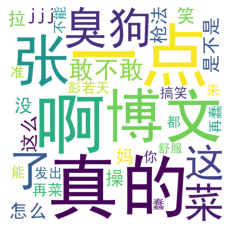

In [11]:
plt.imshow(word)    #使用plt库显示图片
plt.axis("off")
print("此视频的情感得分为：",emo)